## Imports

In [1]:
# Data manipulation
import pandas as pd

# Calculations, removing outliers
import scipy.stats as stats
import numpy as np

# Clustering and Scaling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Silhouette Score
from sklearn.metrics import silhouette_score

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Increase resolution, display plots inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#Import Data
df = pd.read_csv('~/Desktop/D212/churn_clean.csv')

## Prepare Data

In [3]:
#Examine shape
df.shape

(10000, 50)

In [4]:
#Select initial variables
df = df[['Tenure', 'Income', 'Age', 'Children', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [5]:
#Examine reduced dataset
print(df)

         Tenure    Income  Age  Children  MonthlyCharge  Bandwidth_GB_Year
0      6.795513  28561.99   68         0     172.455519         904.536110
1      1.156681  21704.77   27         1     242.632554         800.982766
2     15.754144   9609.57   50         4     159.947583        2054.706961
3     17.087227  18925.23   48         1     119.956840        2164.579412
4      1.670972  40074.19   83         0     149.948316         271.493436
...         ...       ...  ...       ...            ...                ...
9995  68.197130  55723.74   23         3     159.979400        6511.252601
9996  61.040370  34129.34   48         4     207.481100        5695.951810
9997  47.416890  45983.43   48         1     169.974100        4159.305799
9998  71.095600  16667.58   39         1     252.624000        6468.456752
9999  63.350860   9020.92   28         1     217.484000        5857.586167

[10000 rows x 6 columns]


In [6]:
#Check for Duplicates
df.duplicated().sum()

0

In [7]:
#Check for Missing Values
df.isnull().sum()

Tenure               0
Income               0
Age                  0
Children             0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64

In [8]:
# Create Z-score columns for selected features
zscore_cols = ['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
for col in zscore_cols:
    df[f"{col}_Zscore"] = stats.zscore(df[col])

# Drop rows with z-scores higher than 3 or lower than -3 for selected features
for col in zscore_cols:
    df.drop(df[(df[f"{col}_Zscore"] > 3) | (df[f"{col}_Zscore"] < -3)].index, inplace=True)

In [9]:
# Drop z-score columns
df.drop([f"{col}_Zscore" for col in zscore_cols], axis=1, inplace=True)

In [10]:
df.shape

(9668, 6)

In [11]:
#Examine results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure             9668 non-null   float64
 1   Income             9668 non-null   float64
 2   Age                9668 non-null   int64  
 3   Children           9668 non-null   int64  
 4   MonthlyCharge      9668 non-null   float64
 5   Bandwidth_GB_Year  9668 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 528.7 KB


## Examine

In [12]:
df.head()

,Tenure,Income,Age,Children,MonthlyCharge,Bandwidth_GB_Year
0,6.795513,28561.99,68,0,172.455519,904.536110
1,1.156681,21704.77,27,1,242.632554,800.982766
2,15.754144,9609.57,50,4,159.947583,2054.706961
3,17.087227,18925.23,48,1,119.956840,2164.579412
4,1.670972,40074.19,83,0,149.948316,271.493436


In [13]:
#View Summary Statistics
df.describe()

,Tenure,Income,Age,Children,MonthlyCharge,Bandwidth_GB_Year
count,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000
mean,34.506724,38215.014257,53.127017,1.941663,172.681236,3386.303983
std,26.447271,25000.561282,20.678068,1.898127,42.896095,2185.919847
min,1.005104,348.670000,18.000000,0.000000,79.978860,155.506715
25%,7.903307,19028.347500,35.000000,0.000000,139.979229,1231.320584
50%,34.650137,32734.285000,53.000000,1.000000,167.484702,3276.843505
75%,61.455400,52078.705000,71.000000,3.000000,202.443300,5581.350581
max,71.999280,124025.100000,89.000000,8.000000,290.160419,7158.981530


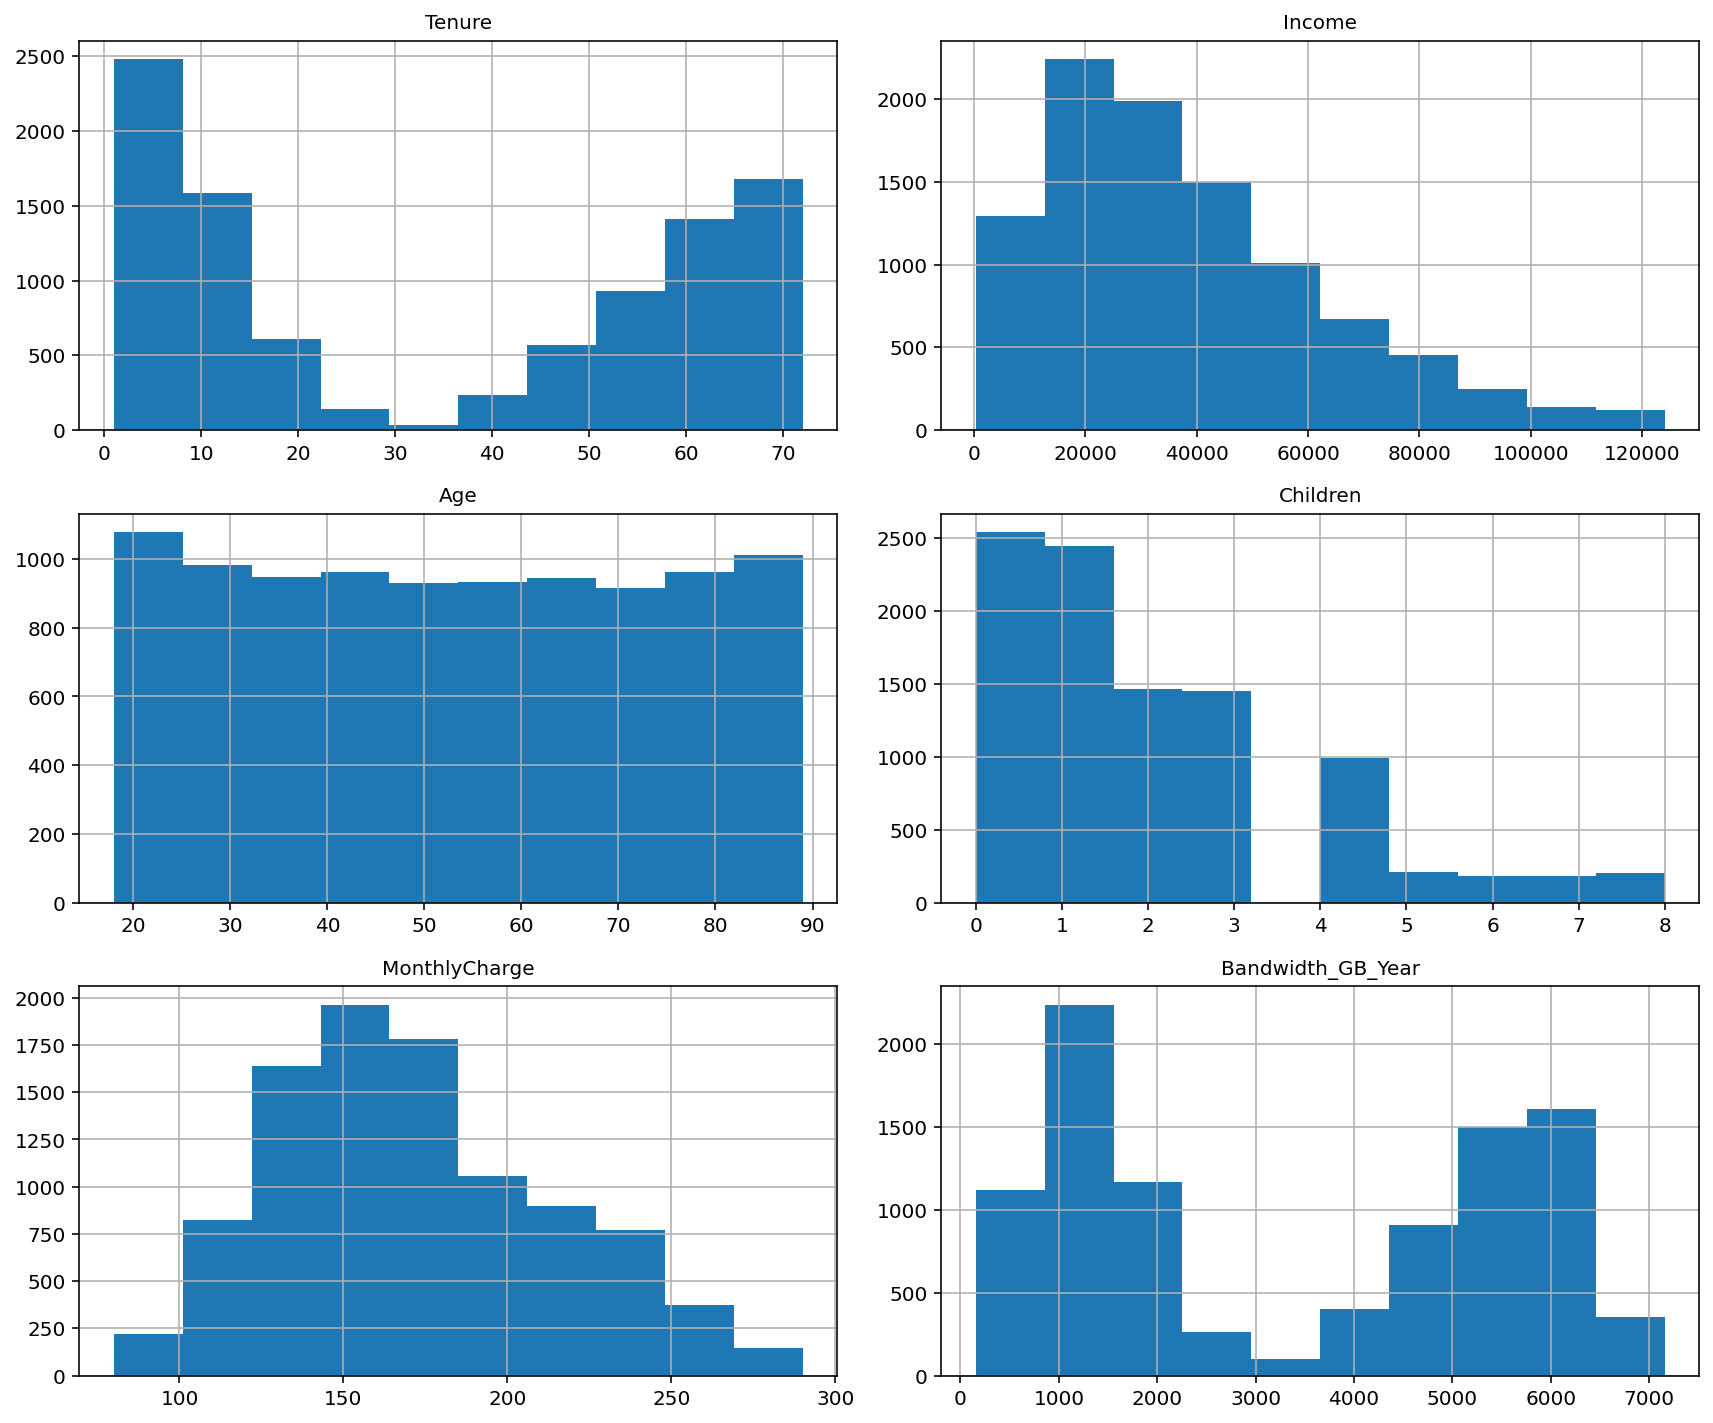

In [14]:
#Univariate Visualizations
fig = df.hist(figsize=(12, 10))
[x.title.set_size(10) for x in fig.ravel()]
plt.tight_layout()
plt.show()

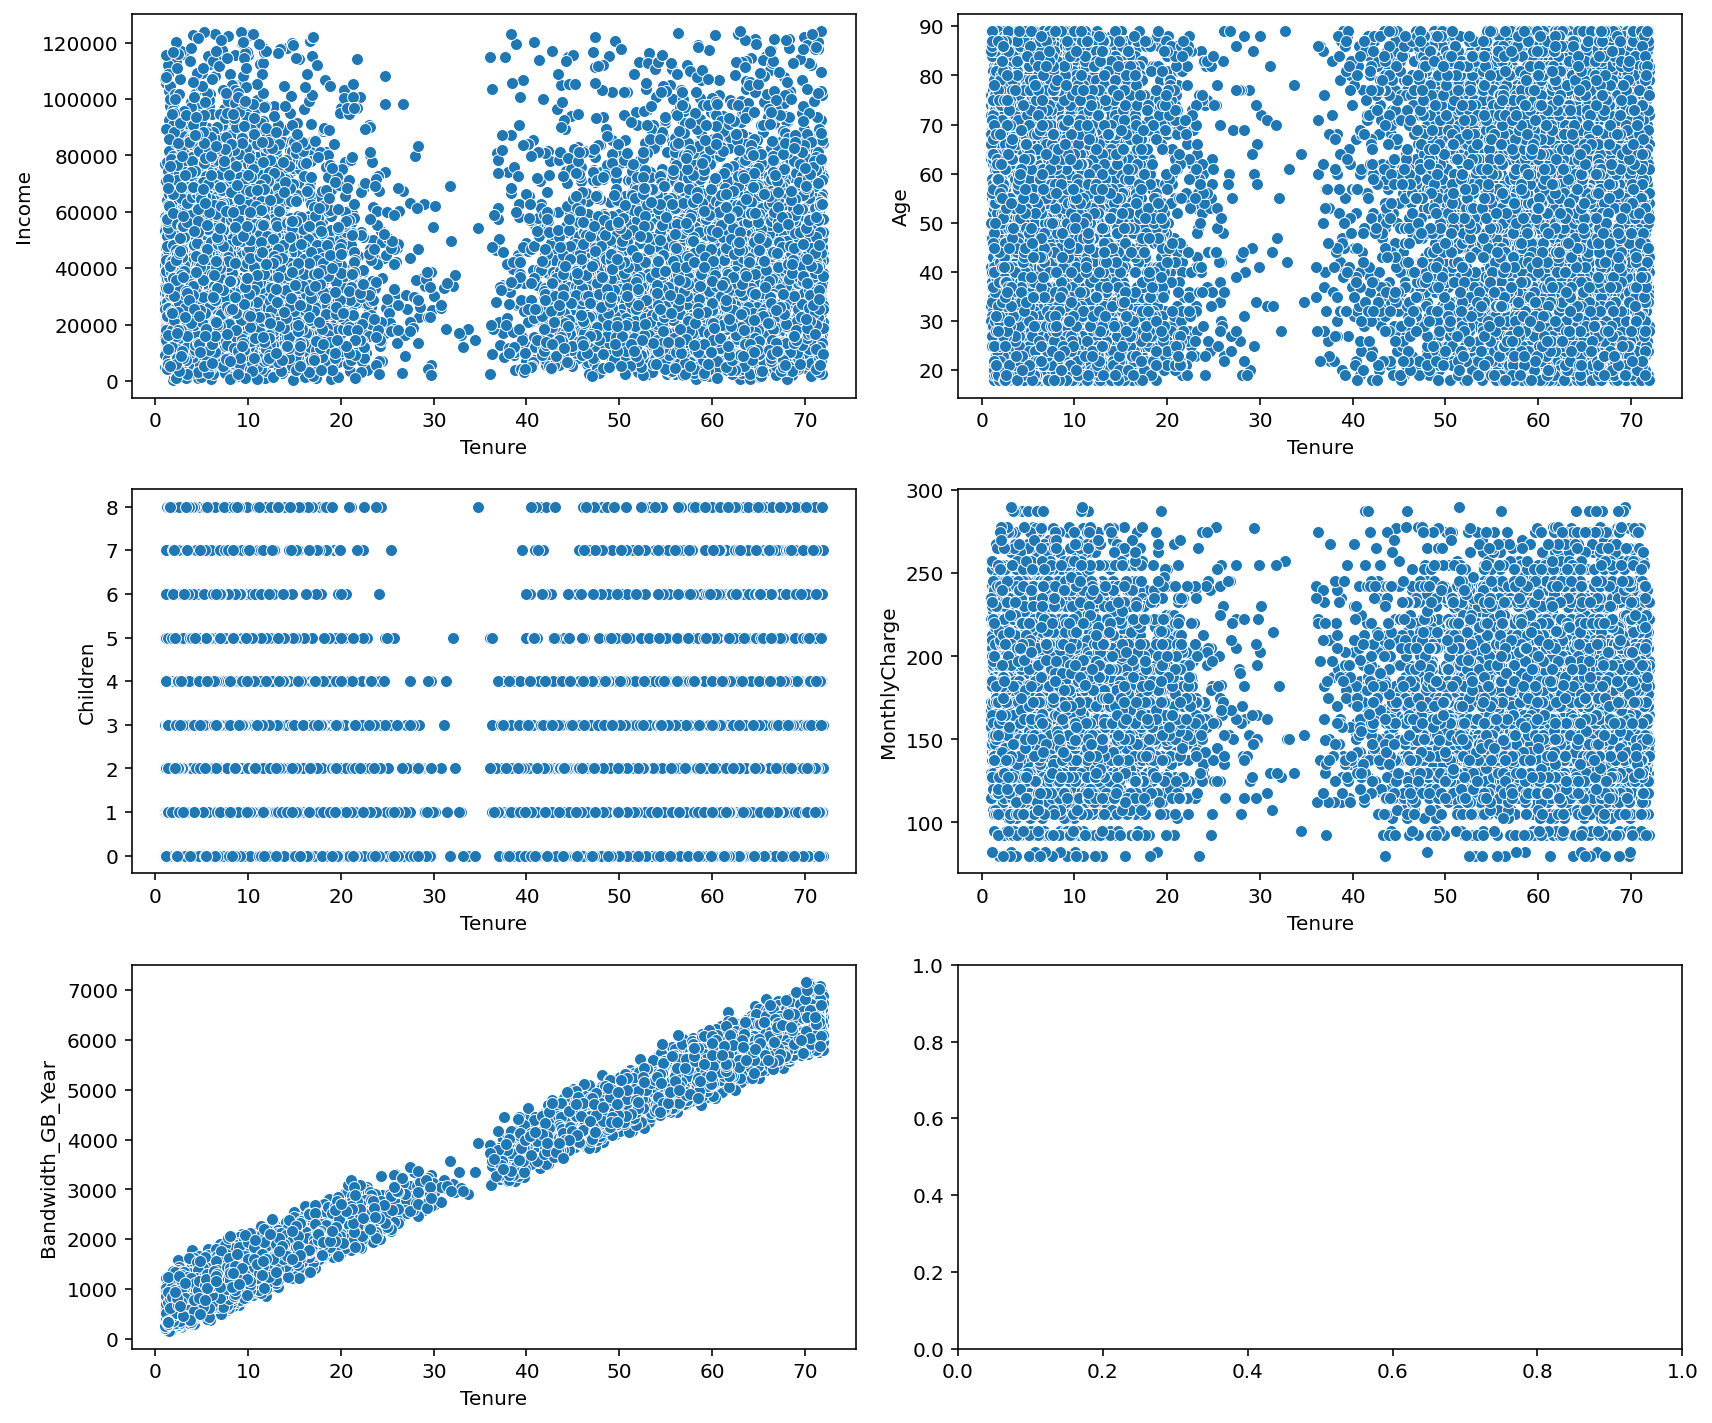

In [15]:
# Get features except Tenure/last column
features = [col for col in df.columns if col not in ['Tenure']]

# Set rows/columns
n_rows = 3
n_cols = 2

# Figure and subplot array
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Scatterplots
for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    sns.scatterplot(x='Tenure', y=feature, data=df, ax=axes[row, col])

# Fix spacing
fig.tight_layout()

# Show plot
plt.show()


In [16]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [17]:
#Export to CSV
df.to_csv("~/Desktop/D212/preprocessed_data.csv")

## Perform K-means

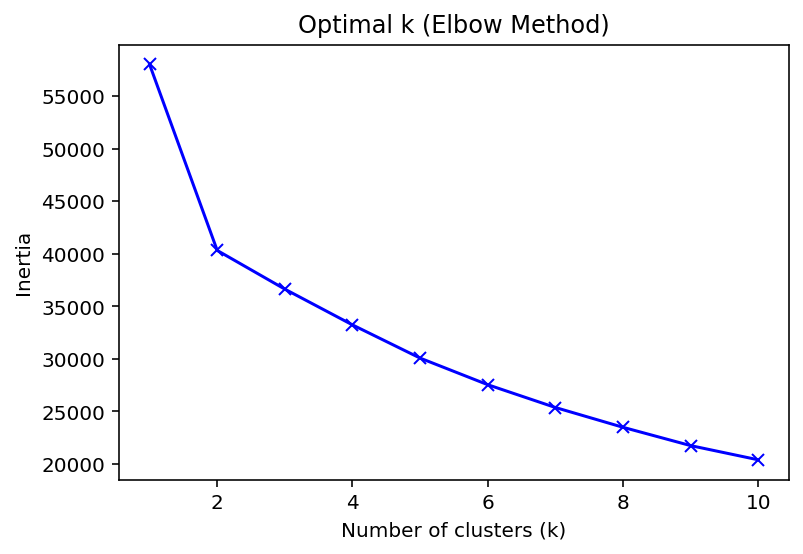

In [18]:
# Find optimal k via elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimal k (Elbow Method)')
plt.show()

In [19]:
# Clustering with the optimal k (Arvai, n.d.)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)
df['Cluster'] = kmeans.labels_

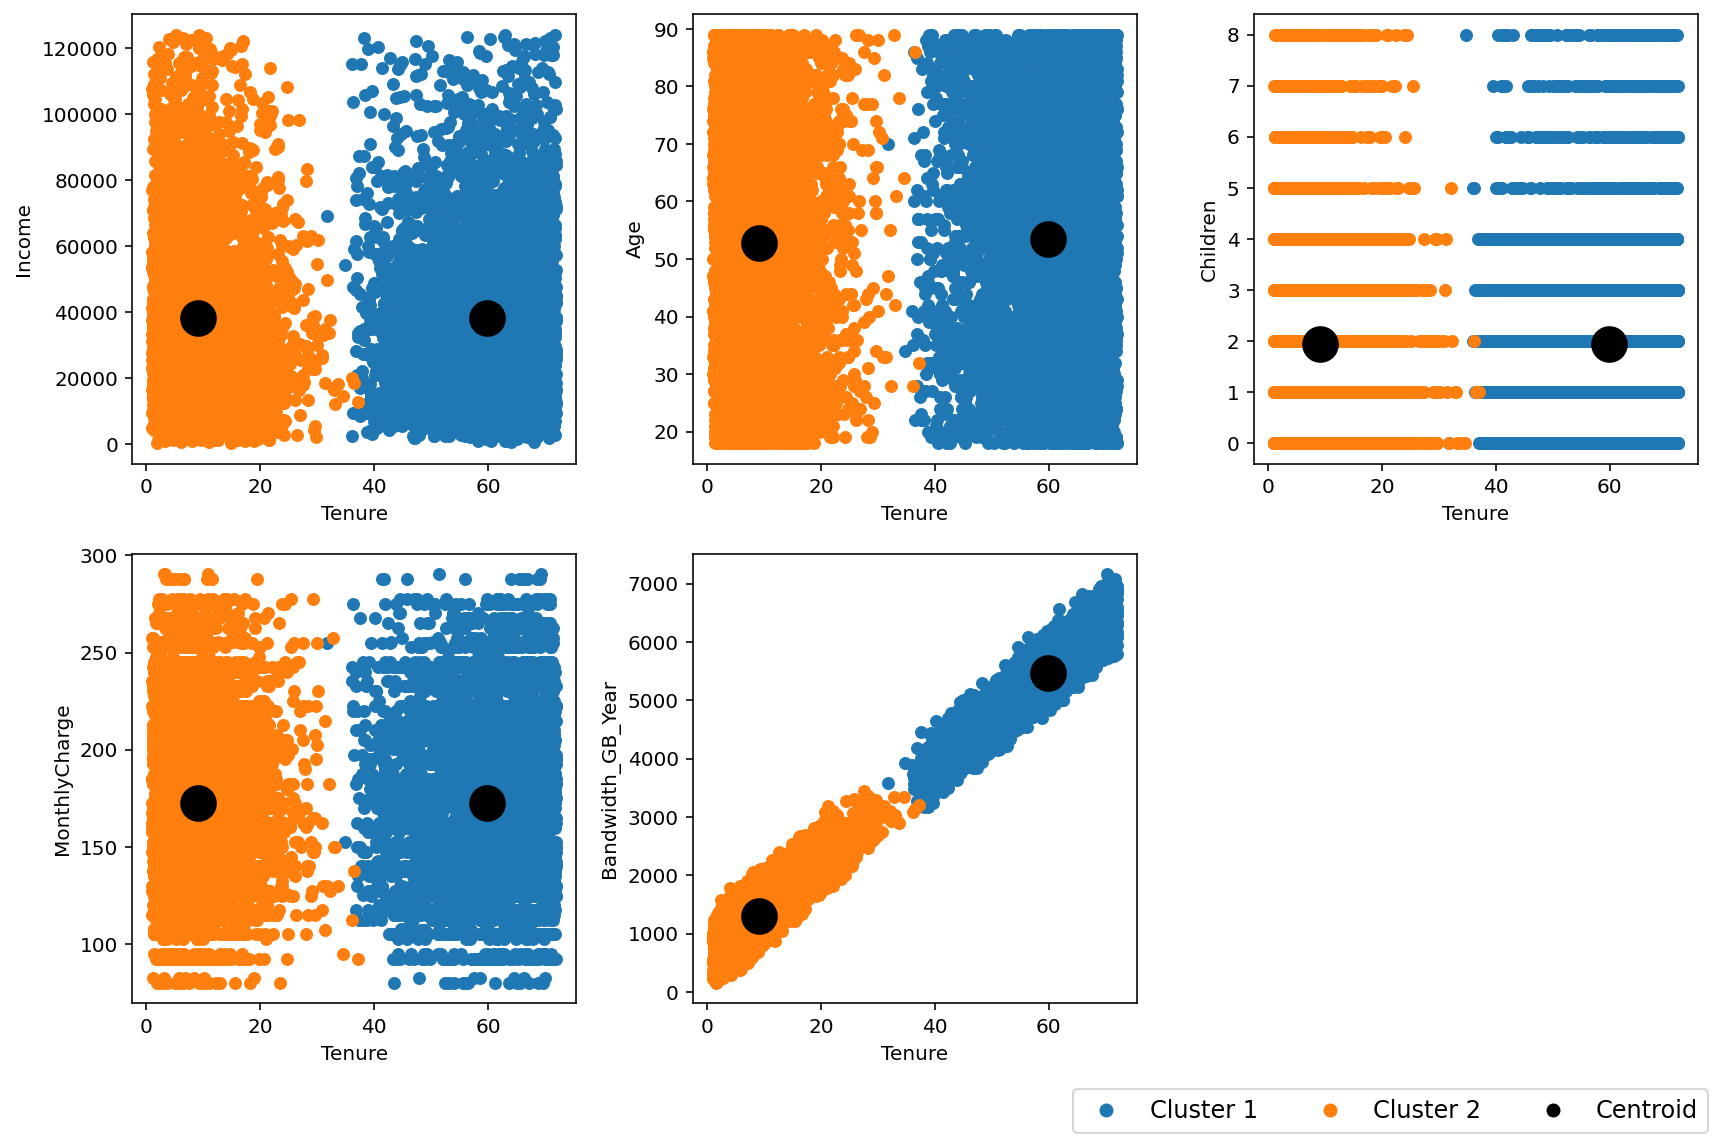

In [20]:
# Get columns
features = [col for col in df.columns[:-1] if col != 'Tenure']

# Set Rows/Columns
n_rows = 2
n_cols = 3

# Set subplot size
subplot_width = 4
subplot_height = 4

# Set figure size
fig_width = n_cols * subplot_width
fig_height = n_rows * subplot_height

# Create figure/subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))

# Add legend labels
clusters = ['Cluster 1', 'Cluster 2']

# Create scatterplots for features vs tenure (Venmani A D., n.d.; PYnative, 2021)
for i in range(n_rows):
    for j in range(n_cols):
        index = i * n_cols + j
        if index < len(features):
            for k in range(len(df['Cluster'].unique())):
                df_cluster = df[df['Cluster'] == k]
                axes[i, j].scatter(df_cluster['Tenure'], df_cluster[features[index]], s=30, label=clusters[k])

                # Adding centroids
                centroid = df_cluster[features].mean()
                axes[i, j].scatter(df_cluster['Tenure'].mean(), centroid[features[index]], marker='o', color='black', s=300, label='Centroid' if k == 0 else None)

            # Add x and y labels
            axes[i, j].set_xlabel('Tenure')
            axes[i, j].set_ylabel(features[index])

# Drop empty subplots
for i in range(len(features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Fix spacing
fig.tight_layout(rect=[0, 0.05, 1, 1])

# Create legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='C'+str(i), markersize=8) for i, label in enumerate(clusters)]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Centroid', markerfacecolor='black', markersize=8))

# Add legend
fig.legend(handles=legend_elements, loc='lower right', ncol=len(clusters) + 1, bbox_to_anchor=(1, 0), fontsize='large')

# Show plots
plt.show()


In [21]:
# Define clusters
clusters = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, clusters)

print(f' For the optimal k ({optimal_k}) the silhouette score is: {silhouette_avg:.2f}.')

 For the optimal k (2) the silhouette score is: 0.30.
